In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
from transformers import AutoModel, AutoTokenizer

In [6]:
# Load SNLI dataset
dataset = load_dataset("stanfordnlp/snli")

In [7]:
print(dataset)

DatasetDict({
    test: Dataset({
        features: ['premise', 'hypothesis', 'label'],
        num_rows: 10000
    })
    validation: Dataset({
        features: ['premise', 'hypothesis', 'label'],
        num_rows: 10000
    })
    train: Dataset({
        features: ['premise', 'hypothesis', 'label'],
        num_rows: 550152
    })
})


In [8]:
# Convert to DataFrame
df_train = pd.DataFrame(dataset["train"])
df_val = pd.DataFrame(dataset["validation"])
df_test = pd.DataFrame(dataset["test"])

In [9]:
print(df_train.head())
print(df_train.shape)
print(df_val.head())
print(df_val.shape)
print(df_test.head())
print(df_test.shape)

                                             premise  \
0  A person on a horse jumps over a broken down a...   
1  A person on a horse jumps over a broken down a...   
2  A person on a horse jumps over a broken down a...   
3              Children smiling and waving at camera   
4              Children smiling and waving at camera   

                                          hypothesis  label  
0  A person is training his horse for a competition.      1  
1      A person is at a diner, ordering an omelette.      2  
2                  A person is outdoors, on a horse.      0  
3                  They are smiling at their parents      1  
4                         There are children present      0  
(550152, 3)
                                             premise  \
0  Two women are embracing while holding to go pa...   
1  Two women are embracing while holding to go pa...   
2  Two women are embracing while holding to go pa...   
3  Two young children in blue jerseys, one with t...   

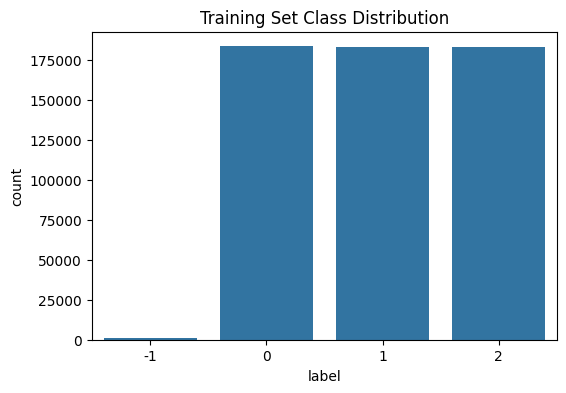

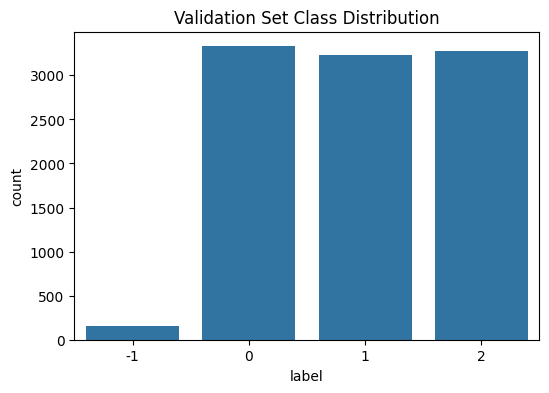

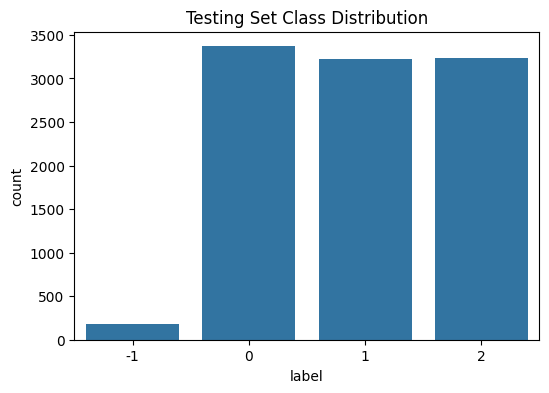

In [10]:
def plot_class_distribution(df, title):
    plt.figure(figsize=(6, 4))
    sns.countplot(x="label", data=df)
    plt.title(title)
    plt.show()

plot_class_distribution(df_train, "Training Set Class Distribution")
plot_class_distribution(df_val, "Validation Set Class Distribution")
plot_class_distribution(df_test, "Testing Set Class Distribution")

In [13]:
def plot_text_length_distribution(df, title):
    # Add text character length columns
    df["premise_character_count"] = df["premise"].apply(len)
    df["hypothesis_character_count"] = df["hypothesis"].apply(len)

    plt.figure(figsize=(10, 5))
    sns.histplot(df["premise_character_count"], bins=50, kde=True, label="Premise")
    sns.histplot(df["hypothesis_character_count"], bins=50, kde=True, label="Hypothesis", color="red")
    plt.legend()
    plt.xlabel("Character Count")
    plt.ylabel("Frequency")
    plt.title(title)
    plt.show()

    # Add text word count columns
    df["premise_word_count"] = df["premise"].apply(lambda x: len(x.split()))
    df["hypothesis_word_count"] = df["hypothesis"].apply(lambda x: len(x.split()))

    plt.figure(figsize=(10, 5))
    sns.histplot(df["premise_word_count"], bins=50, kde=True, label="Premise")
    sns.histplot(df["hypothesis_word_count"], bins=50, kde=True, label="Hypothesis", color="red")
    plt.legend()
    plt.xlabel("Word Count")
    plt.ylabel("Frequency")
    plt.title(title)
    plt.show()

    # Load tokenizer
    tokenizer = AutoTokenizer.from_pretrained("microsoft/MiniLM-L12-H384-uncased")

    # Tokenize without padding to get the true sequence lengths
    df["premise_token_count"] = df["premise"].apply(lambda x: len(tokenizer(x, padding=False, truncation=False)["input_ids"]))
    df["hypothesis_token_count"] = df["hypothesis"].apply(lambda x: len(tokenizer(x, padding=False, truncation=False)["input_ids"]))

    plt.figure(figsize=(10, 5))
    sns.histplot(df["premise_token_count"], bins=50, kde=True, label="Premise")
    sns.histplot(df["hypothesis_token_count"], bins=50, kde=True, label="Hypothesis", color="red")
    plt.legend()
    plt.xlabel("Token Count")
    plt.ylabel("Frequency")
    plt.title(f"{title} (MiniLM Tokenizer)")
    plt.show()

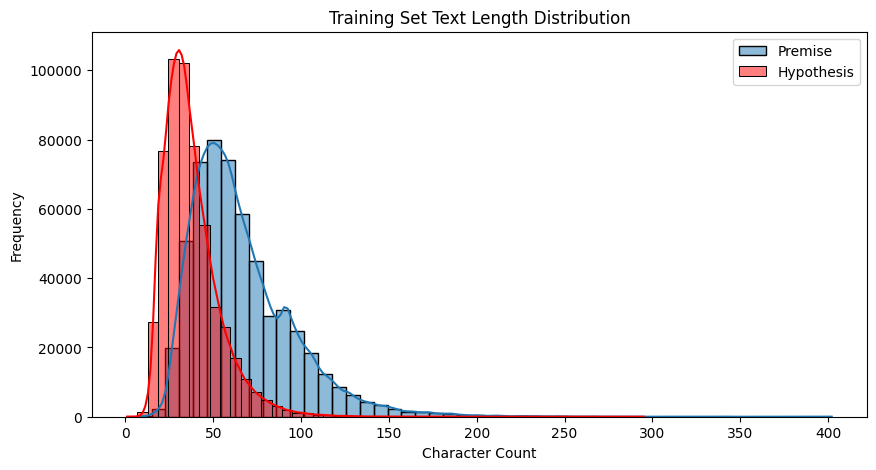

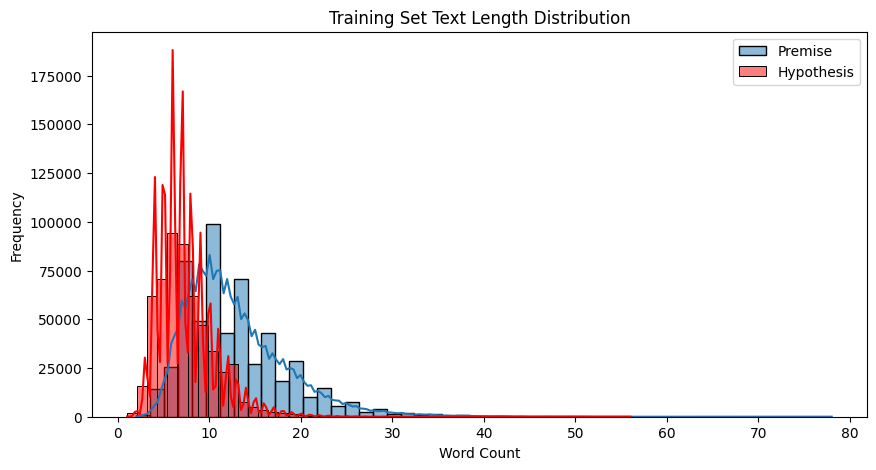

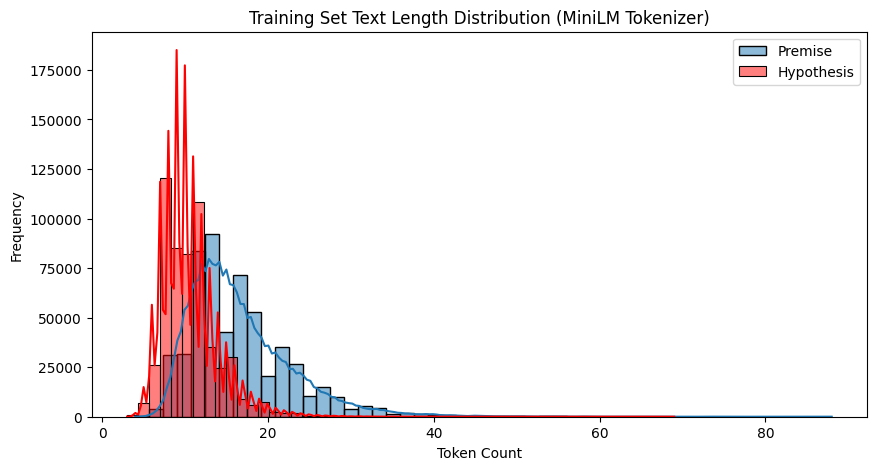

In [14]:
plot_text_length_distribution(df_train, "Training Set Text Length Distribution")

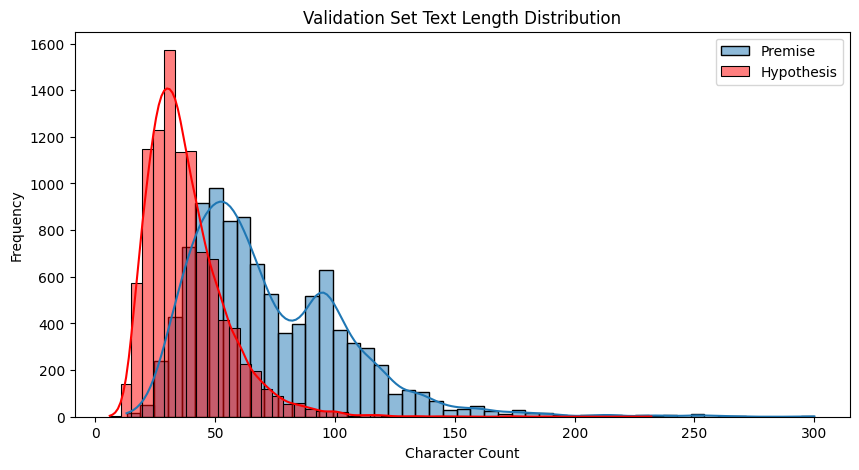

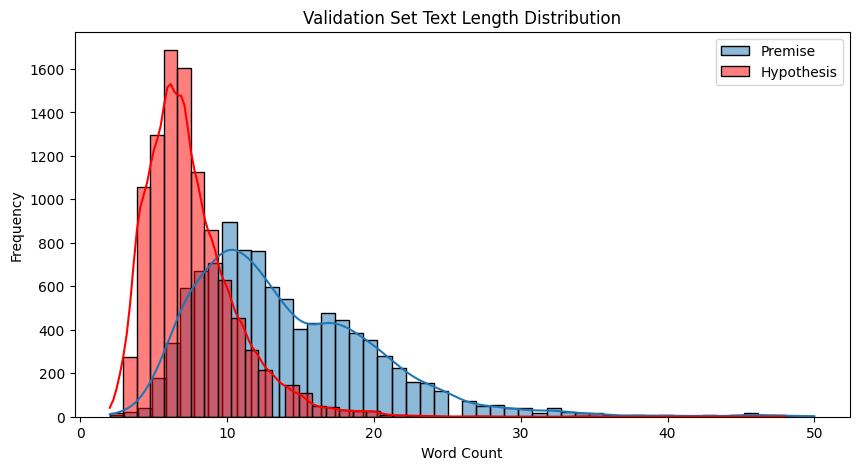

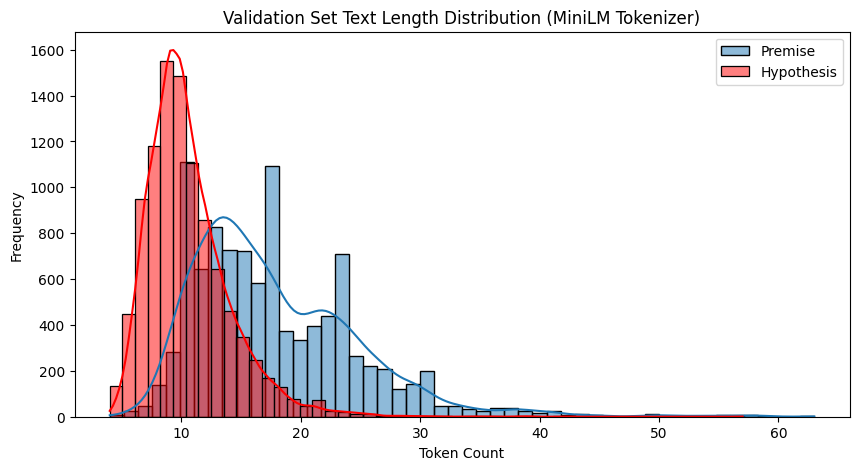

In [15]:
plot_text_length_distribution(df_val, "Validation Set Text Length Distribution")

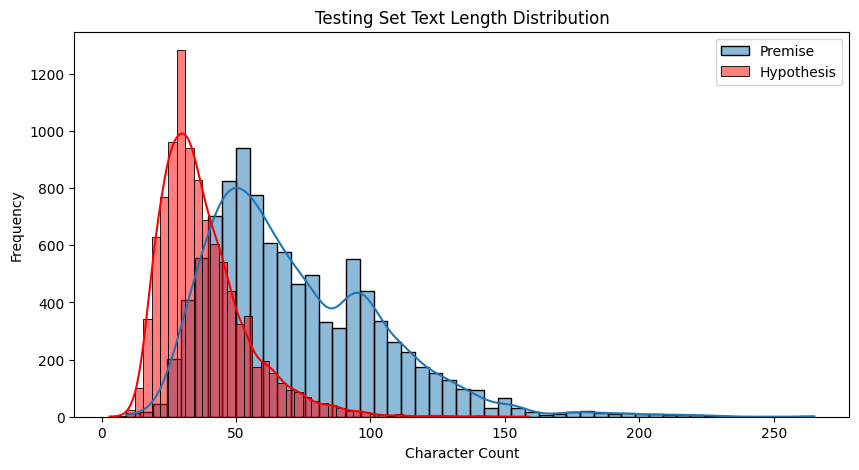

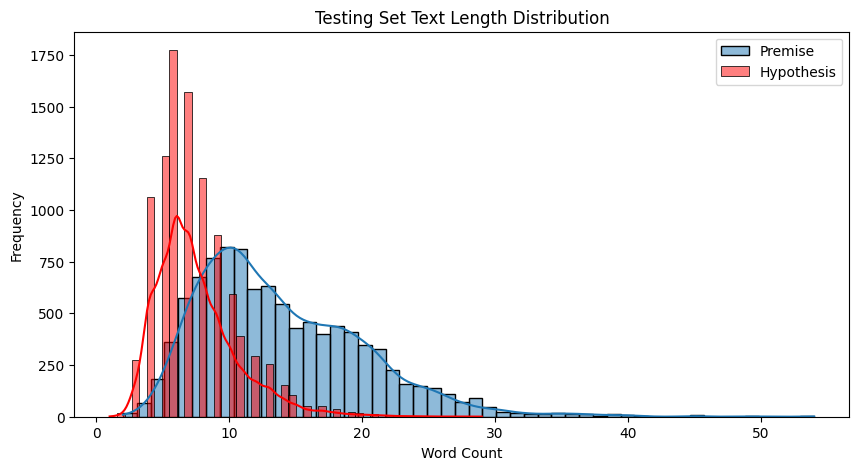

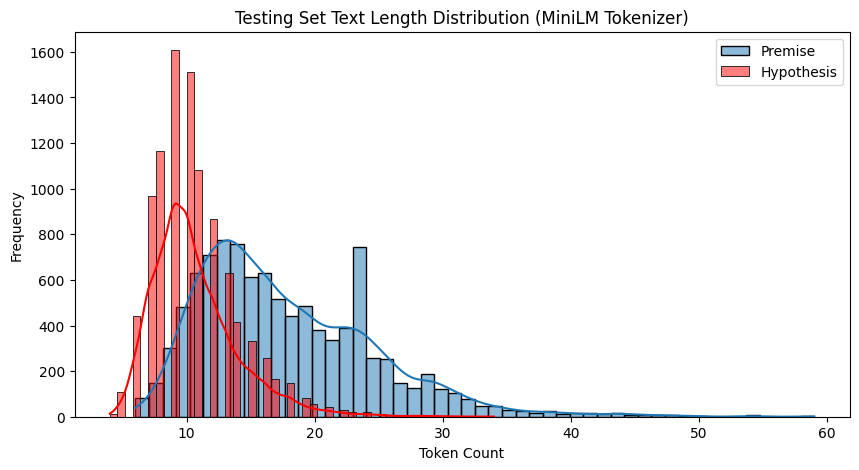

In [16]:
plot_text_length_distribution(df_test, "Testing Set Text Length Distribution")

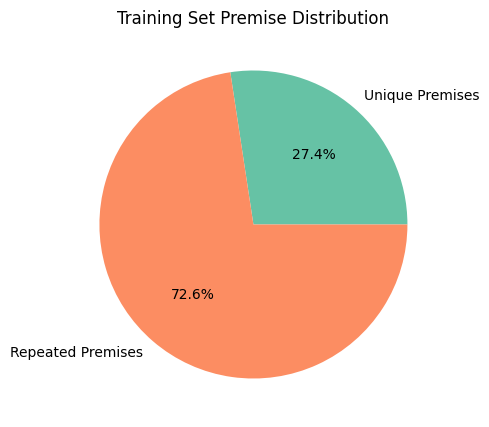

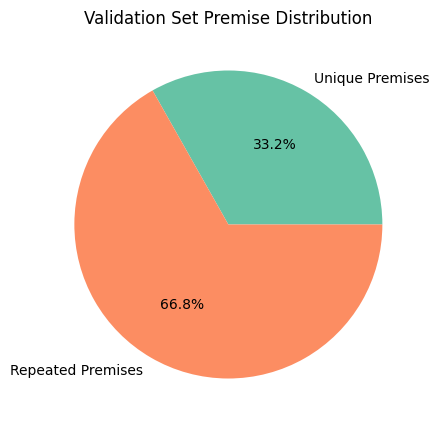

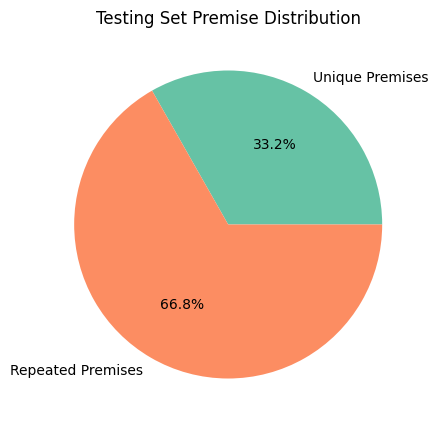

In [17]:
def plot_unique_premise_ratio(df, title):
    unique_premises = df["premise"].nunique()
    total_premises = len(df)

    labels = ["Unique Premises", "Repeated Premises"]
    values = [unique_premises, total_premises - unique_premises]

    plt.figure(figsize=(5, 5))
    plt.pie(values, labels=labels, autopct="%1.1f%%", colors=["#66c2a5", "#fc8d62"])
    plt.title(title)
    plt.show()

plot_unique_premise_ratio(df_train, "Training Set Premise Distribution")
plot_unique_premise_ratio(df_val, "Validation Set Premise Distribution")
plot_unique_premise_ratio(df_test, "Testing Set Premise Distribution")

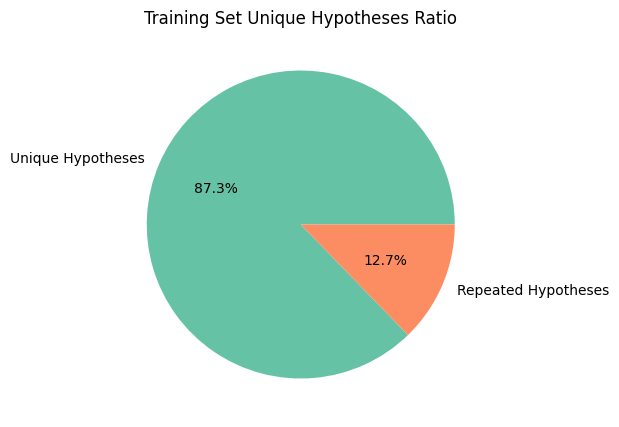

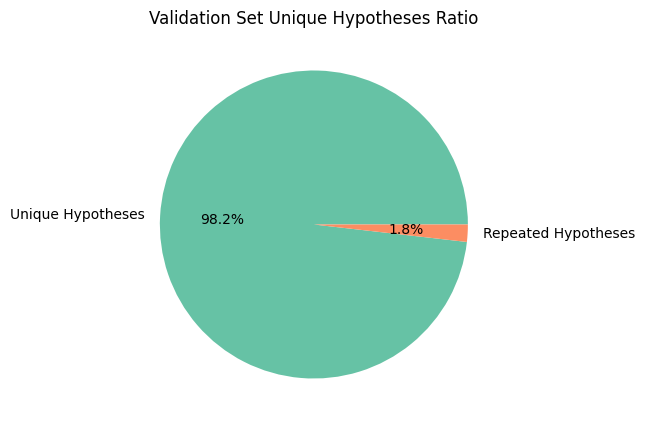

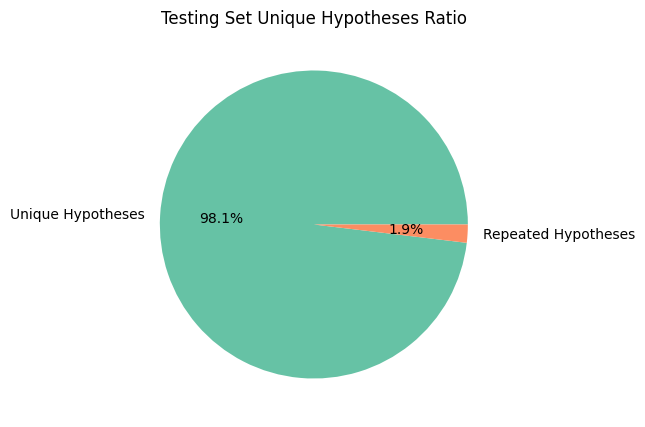

In [18]:
def plot_unique_hypothesis_ratio(df, title):
    unique_hypotheses = df["hypothesis"].nunique()
    total_hypotheses = len(df)

    labels = ["Unique Hypotheses", "Repeated Hypotheses"]
    values = [unique_hypotheses, total_hypotheses - unique_hypotheses]

    plt.figure(figsize=(5, 5))
    plt.pie(values, labels=labels, autopct="%1.1f%%", colors=["#66c2a5", "#fc8d62"])
    plt.title(title)
    plt.show()

plot_unique_hypothesis_ratio(df_train, "Training Set Unique Hypotheses Ratio")
plot_unique_hypothesis_ratio(df_val, "Validation Set Unique Hypotheses Ratio")
plot_unique_hypothesis_ratio(df_test, "Testing Set Unique Hypotheses Ratio")

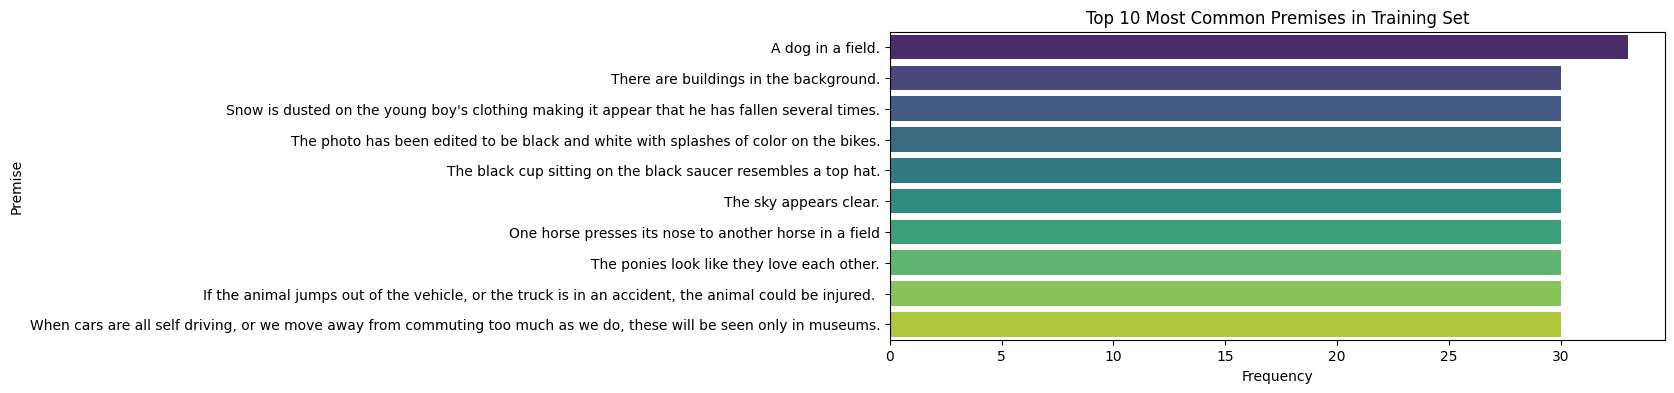

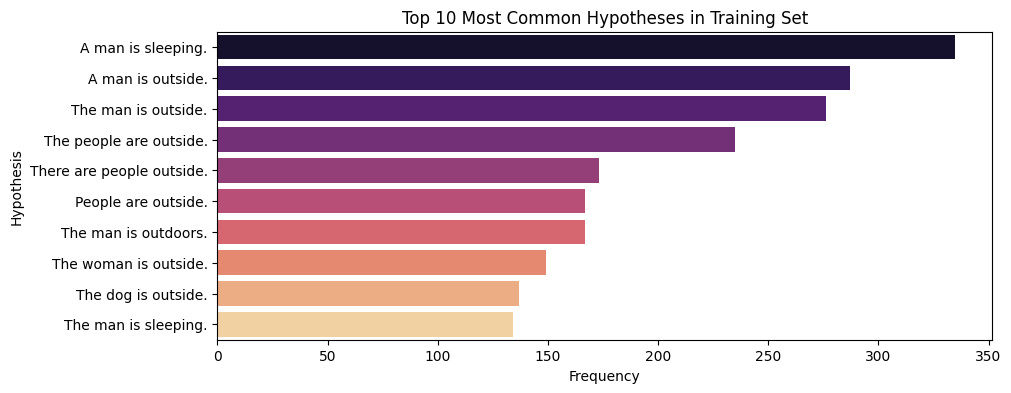

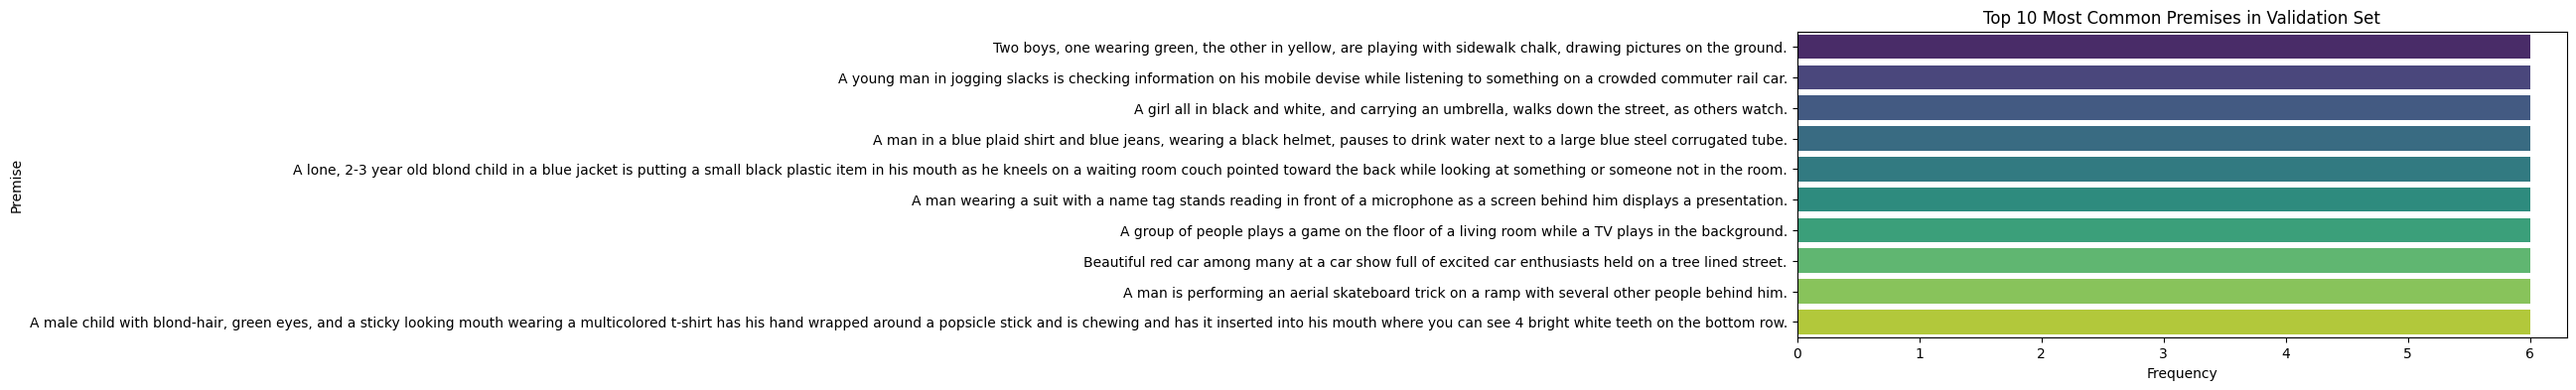

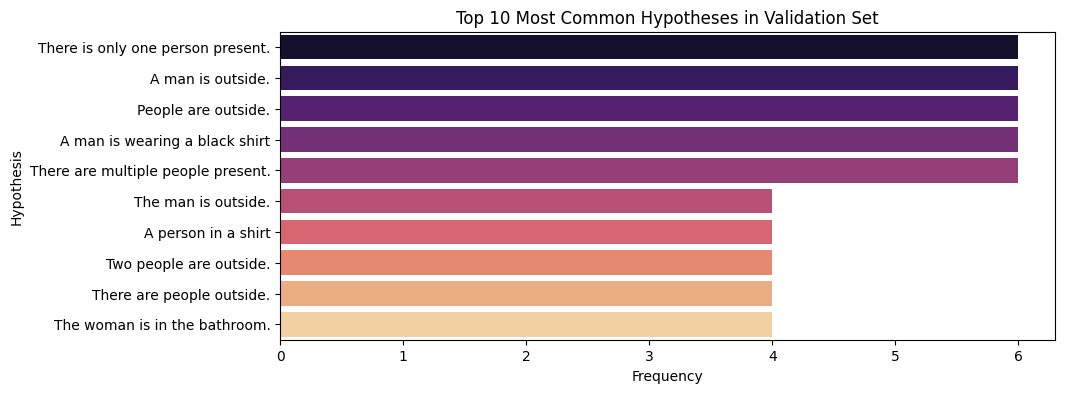

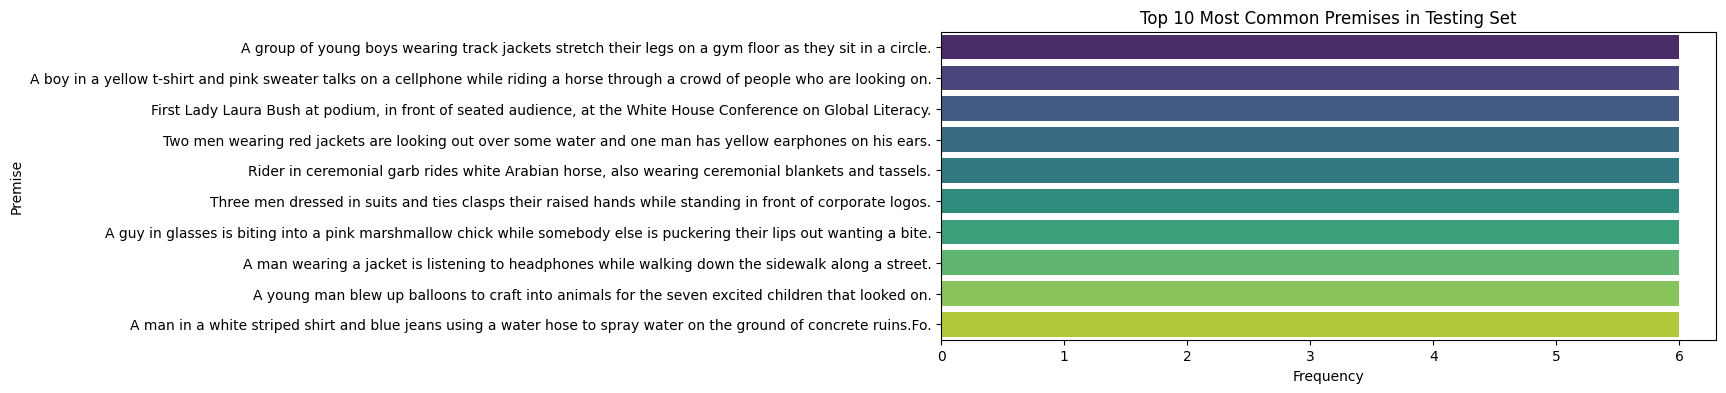

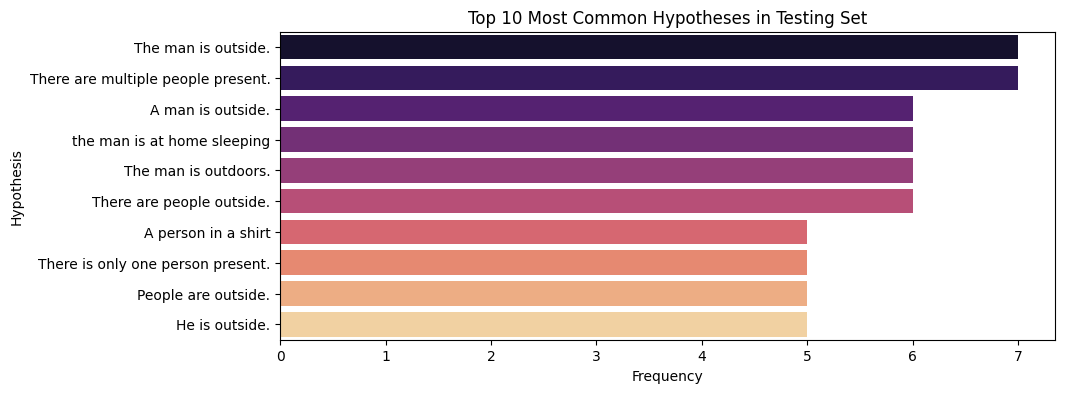

In [19]:
def plot_most_common_premises_hypotheses(df, title, top_n=10):
    # Count occurrences of each premise
    premise_counts = df["premise"].value_counts().reset_index()
    premise_counts.columns = ["premise", "count"]
    premise_counts = premise_counts.head(top_n)

    # Count occurrences of each hypothesis
    hypothesis_counts = df["hypothesis"].value_counts().reset_index()
    hypothesis_counts.columns = ["hypothesis", "count"]
    hypothesis_counts = hypothesis_counts.head(top_n)

    plt.figure(figsize=(10, 4))
    sns.barplot(x="count", y="premise", data=premise_counts, palette="viridis", hue="premise")
    plt.xlabel("Frequency")
    plt.ylabel("Premise")
    plt.title(f"Top {top_n} Most Common Premises in {title}")
    plt.show()

    plt.figure(figsize=(10, 4))
    sns.barplot(x="count", y="hypothesis", data=hypothesis_counts, palette="magma", hue="hypothesis")
    plt.xlabel("Frequency")
    plt.ylabel("Hypothesis")
    plt.title(f"Top {top_n} Most Common Hypotheses in {title}")
    plt.show()

plot_most_common_premises_hypotheses(df_train, "Training Set")
plot_most_common_premises_hypotheses(df_val, "Validation Set")
plot_most_common_premises_hypotheses(df_test, "Testing Set")